## Pitching Data Exploration and Predictions

### Problem: In the last twenty years, what baseball statistics make for good predictors of a pitcher's ERA?

In [1]:
#Read in the file as Pandas dataframe
import pandas as pd
import numpy as np

# File can be found at http://www.seanlahman.com/baseball-archive/statistics/
filename = 'pitching.csv'
pitchers = pd.read_csv(filename)

In [2]:
# Let's see how it looks
pitchers

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
5,flowedi01,1871,1,TRO,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN
6,mackde01,1871,1,RC1,NaN,0,1,3,1,1,...,NaN,NaN,NaN,0,NaN,NaN,30,NaN,NaN,NaN
7,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,NaN,NaN,NaN,2,NaN,NaN,243,NaN,NaN,NaN
8,mcbridi01,1871,1,PH1,NaN,18,5,25,25,25,...,NaN,NaN,NaN,0,NaN,NaN,223,NaN,NaN,NaN
9,mcmuljo01,1871,1,TRO,NaN,12,15,29,29,28,...,NaN,NaN,NaN,0,NaN,NaN,362,NaN,NaN,NaN


In [3]:
# I will eventually look into certain categories for the last 20 years, but I want to be sure there aren't any NaN values
# that might alter the data.
pitchers.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          131
W               0
L               0
G               0
GS              0
CG              0
SHO             0
SV              0
IPouts          1
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp        1525
ERA            90
IBB         14575
WP            133
HBP           559
BK              0
BFP           239
GF            133
R               0
SH          32900
SF          32900
GIDP        43394
dtype: int64

In [4]:
# Filtering the last 20 years for pitchers with at least 27 outs 
last_20 = pitchers.loc[pitchers['yearID'] >= 1996]
last_20_outs = last_20.loc[last_20['IPouts'] >= 27]
last_20_outs.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
30449,abbotji01,1996,1,CAL,AL,2,18,27,23,1,...,3.0,13.0,4.0,1,654.0,2.0,128,NaN,NaN,NaN
30451,acrema01,1996,1,OAK,AL,1,3,22,0,0,...,4.0,0.0,2.0,0,124.0,11.0,17,NaN,NaN,NaN
30452,adamsjo02,1996,1,FLO,NL,0,0,9,0,0,...,0.0,0.0,1.0,0,56.0,1.0,9,NaN,NaN,NaN
30453,adamste01,1996,1,CHN,NL,3,6,69,0,0,...,6.0,5.0,1.0,1,423.0,22.0,36,NaN,NaN,NaN
30454,adamswi02,1996,1,OAK,AL,3,4,12,12,1,...,3.0,2.0,5.0,0,329.0,0.0,39,NaN,NaN,NaN


In [5]:
# Here are the stats I evenutally want to count
last_20_org = pd.pivot_table(last_20_outs,index=["playerID","yearID"],\
                                    values=["IPouts", "H", "ER", "HR", "BB", "R", "SO"],aggfunc=np.sum).reset_index()
last_20_org.head()

,playerID,yearID,BB,ER,H,HR,IPouts,R,SO
0,aardsda01,2004,10,8,20,1,32.0,8,5
1,aardsda01,2006,28,24,41,9,159.0,25,49
2,aardsda01,2007,17,23,39,4,97.0,24,36
3,aardsda01,2008,35,30,49,4,146.0,32,49
4,aardsda01,2009,34,20,49,4,214.0,23,80


In [6]:
last_20_org.isnull().sum()

playerID    0
yearID      0
BB          0
ER          0
H           0
HR          0
IPouts      0
R           0
SO          0
dtype: int64

NaNs primarily appear in the first set of values for many categories because these stats were not recorded in the 19th 
century. They completely disappear for the stats of which I am interested when I apply the last 20 years and 27 outs filter, so I will not worry about NaN values when I hone in on my problem.

In [7]:
# Let's look at stats by year, organizing with a pivot table
# Pandas df will average
# fill_value = 0 to get rid of NaNs for the purpose of averaging
pd.pivot_table(pitchers,index=['yearID'], fill_value = 0).head()

,BAOpp,BB,BFP,BK,CG,ER,ERA,G,GF,GIDP,...,L,R,SF,SH,SHO,SO,SV,W,WP,stint
yearID,,,,,,,,,,,,,,,,,,,,,
1871,0.0,20.684211,0.0,0.105263,12.157895,55.526316,5.991579,14.578947,0.0,0.0,...,6.315789,139.947368,0.0,0.0,0.210526,9.210526,0.210526,6.315789,0.0,1.000000
1872,0.0,10.695652,0.0,0.086957,14.304348,59.000000,4.798696,17.521739,0.0,0.0,...,7.739130,147.347826,0.0,0.0,0.434783,10.956522,0.086957,7.739130,0.0,1.130435
1873,0.0,12.840000,0.0,0.040000,14.560000,51.800000,4.315600,17.280000,0.0,0.0,...,7.880000,143.200000,0.0,0.0,0.320000,9.600000,0.160000,7.880000,0.0,1.000000
1874,0.0,14.000000,0.0,0.000000,25.882353,82.294118,4.899412,28.764706,0.0,0.0,...,13.588235,204.117647,0.0,0.0,0.882353,11.294118,0.235294,13.588235,0.0,1.000000
1875,0.0,5.553191,0.0,0.106383,13.212766,36.000000,4.239149,16.234043,0.0,0.0,...,7.127660,90.085106,0.0,0.0,1.021277,8.234043,0.382979,7.127660,0.0,1.127660


In [8]:
#Stats by Player
pd.pivot_table(pitchers,index=['playerID'], fill_value = 0).head()

,BAOpp,BB,BFP,BK,CG,ER,ERA,G,GF,GIDP,...,R,SF,SH,SHO,SO,SV,W,WP,stint,yearID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,0.257111,20.333333,163.888889,0.111111,0.000000,17.777778,5.194444,36.777778,15.666667,0.0,...,18.777778,1.222222,1.888889,0.000000,37.777778,7.666667,1.777778,1.333333,1.000000,2009.333333
aasedo01,0.246923,35.153846,363.846154,0.230769,1.692308,36.000000,3.493077,34.461538,18.000000,0.0,...,38.692308,0.000000,0.000000,0.384615,49.307692,6.307692,5.076923,1.615385,1.000000,1983.538462
abadfe01,0.255667,12.833333,161.666667,0.000000,0.000000,15.666667,4.053333,43.000000,11.000000,6.0,...,16.500000,1.500000,1.166667,0.000000,32.166667,0.000000,0.833333,1.333333,1.000000,2012.500000
abbeybe01,0.295000,32.000000,0.000000,0.000000,8.666667,47.500000,4.678333,13.166667,2.000000,0.0,...,73.666667,0.000000,0.000000,0.000000,26.833333,0.166667,3.666667,3.000000,1.166667,1894.166667
abbeych01,0.510000,0.000000,0.000000,0.000000,0.000000,1.000000,4.500000,1.000000,1.000000,0.0,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1896.000000


In [9]:
#Stats by player each year
pd.pivot_table(pitchers, index=["playerID","yearID"], fill_value = 0).head()

BAOpp    BB    BFP   BK   CG    ER   ERA     G    GF  GIDP  \
playerID  yearID                                                               
aardsda01 2004    0.417  10.0   61.0  0.0  0.0   8.0  6.75  11.0   5.0   0.0   
          2006    0.214  28.0  225.0  0.0  0.0  24.0  4.08  45.0   9.0   0.0   
          2007    0.300  17.0  151.0  0.0  0.0  23.0  6.40  25.0   7.0   0.0   
          2008    0.268  35.0  228.0  0.0  0.0  30.0  5.55  47.0   7.0   0.0   
          2009    0.189  34.0  296.0  0.0  0.0  20.0  2.52  73.0  53.0   0.0   

                  ...      L     R   SF   SH  SHO    SO    SV    W   WP  stint  
playerID  yearID  ...                                                           
aardsda01 2004    ...    0.0   8.0  1.0  0.0  0.0   5.0   0.0  1.0  0.0    1.0  
          2006    ...    0.0  25.0  3.0  1.0  0.0  49.0   0.0  3.0  1.0    1.0  
          2007    ...    1.0  24.0  1.0  2.0  0.0  36.0   0.0  2.0  2.0    1.0  
          2008    ...    2.0  32.0  2.0  3.0  0.0  49.0   0.0  4.0  3.0    1.0  
          2009    ...    6.0  23.0  1.0  2.0  0.0  80.0  38.0  3.0  2.0    1.0  

[5 rows x 26 columns]

In [10]:
# Some pitchers had 2 or more stints with teams in a given year
# Here are those with 4 or more
pitchers.query('stint >= [4]')

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
10993,hudliwi01,1940,4,NY1,NL,0,1,1,1,0,...,NaN,0.0,0.0,0,23.0,0.0,6,NaN,NaN,NaN
14665,grayte01,1955,4,BAL,AL,1,2,9,1,0,...,1.0,1.0,0.0,0,77.0,5.0,19,NaN,NaN,NaN
20111,kilkemi01,1972,4,CLE,AL,4,1,22,7,1,...,4.0,3.0,0.0,0,255.0,6.0,23,NaN,NaN,NaN
33145,holmeda01,2000,4,ARI,NL,0,0,4,0,0,...,0.0,0.0,1.0,0,19.0,2.0,3,0.0,0.0,NaN
35265,micelda01,2003,4,HOU,NL,1,1,23,0,0,...,1.0,2.0,1.0,1,116.0,8.0,7,2.0,0.0,NaN
37913,kimby01,2007,4,FLO,NL,4,2,9,6,0,...,0.0,3.0,6.0,0,162.0,2.0,33,2.0,2.0,NaN


In [11]:
# I want to sum most of the data to perform, but that won't work for ERA
# I would like to drop those two, so I can eventually enter a new column with those corrected values
pitchers.columns.get_loc("ERA")

19

In [12]:
#Let's double-check
pitchers[[0, 18, 19, 20]].head()

,playerID,BAOpp,ERA,IBB
0,bechtge01,NaN,7.96,NaN
1,brainas01,NaN,4.50,NaN
2,fergubo01,NaN,27.00,NaN
3,fishech01,NaN,4.35,NaN
4,fleetfr01,NaN,10.00,NaN


In [13]:
#Finally we drop
pitchers.drop(pitchers.columns[[19]], axis=1, inplace=True)

In [14]:
#seems to work
pitchers[[0, 18, 19, 20]].head()

,playerID,BAOpp,IBB,WP
0,bechtge01,NaN,NaN,NaN
1,brainas01,NaN,NaN,NaN
2,fergubo01,NaN,NaN,NaN
3,fishech01,NaN,NaN,NaN
4,fleetfr01,NaN,NaN,NaN


In [15]:
# Let's add some key stats (provided the player had multiple stints) using aggfunc and np.sum in the pivot table
# This way I have a pitcher's statistics as one row per year.

organized_pitchers = pd.pivot_table(pitchers,index=["playerID","yearID"],\
                                    values=["IPouts", "H", "ER", "HR", "BB", "R", "SO"],aggfunc=np.sum).reset_index()
organized_pitchers

,playerID,yearID,BB,ER,H,HR,IPouts,R,SO
0,aardsda01,2004,10,8,20,1,32.0,8,5
1,aardsda01,2006,28,24,41,9,159.0,25,49
2,aardsda01,2007,17,23,39,4,97.0,24,36
3,aardsda01,2008,35,30,49,4,146.0,32,49
4,aardsda01,2009,34,20,49,4,214.0,23,80
5,aardsda01,2010,25,19,33,5,149.0,19,49
6,aardsda01,2012,1,1,1,1,3.0,1,1
7,aardsda01,2013,19,19,39,7,119.0,20,36
8,aardsda01,2015,14,16,25,6,92.0,17,35
9,aasedo01,1977,19,32,85,6,277.0,36,49


In [16]:
# Let's compute some adjusted statistics to find how well a pitcher performed instead of how often they performed.
organized_pitchers['BB9'] = organized_pitchers['BB']/(organized_pitchers['IPouts'] / 27)
organized_pitchers['ERA'] = organized_pitchers['ER']/(organized_pitchers['IPouts'] / 27)
organized_pitchers['H9'] = organized_pitchers['H']/(organized_pitchers['IPouts'] / 27)
organized_pitchers['HR9'] = organized_pitchers['HR']/(organized_pitchers['IPouts'] / 27)
organized_pitchers['R9'] = organized_pitchers['R']/(organized_pitchers['IPouts'] / 27)
organized_pitchers['SO9'] = organized_pitchers['SO']/(organized_pitchers['IPouts'] / 27)

organized_pitchers.head()

,playerID,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
0,aardsda01,2004,10,8,20,1,32.0,8,5,8.437500,6.750000,16.875000,0.843750,6.750000,4.218750
1,aardsda01,2006,28,24,41,9,159.0,25,49,4.754717,4.075472,6.962264,1.528302,4.245283,8.320755
2,aardsda01,2007,17,23,39,4,97.0,24,36,4.731959,6.402062,10.855670,1.113402,6.680412,10.020619
3,aardsda01,2008,35,30,49,4,146.0,32,49,6.472603,5.547945,9.061644,0.739726,5.917808,9.061644
4,aardsda01,2009,34,20,49,4,214.0,23,80,4.289720,2.523364,6.182243,0.504673,2.901869,10.093458


In [17]:
# Reorganize like baseball scores
pitcher_data = organized_pitchers[['playerID', 'yearID', 'ERA', 'H9', 'HR9', 'R9', 'BB9', 'SO9', 'IPouts']]
pitcher_data.head()

,playerID,yearID,ERA,H9,HR9,R9,BB9,SO9,IPouts
0,aardsda01,2004,6.750000,16.875000,0.843750,6.750000,8.437500,4.218750,32.0
1,aardsda01,2006,4.075472,6.962264,1.528302,4.245283,4.754717,8.320755,159.0
2,aardsda01,2007,6.402062,10.855670,1.113402,6.680412,4.731959,10.020619,97.0
3,aardsda01,2008,5.547945,9.061644,0.739726,5.917808,6.472603,9.061644,146.0
4,aardsda01,2009,2.523364,6.182243,0.504673,2.901869,4.289720,10.093458,214.0


In [18]:
# Since I'm going to plot this data, I'll try to avoid outliers resulting from a small sample size
# by making the minimum 100 outs
indexed_data = pitcher_data.pivot_table(index = ["playerID","yearID"],\
                                        values=["ERA", "H9", "HR9", "R9", "BB9", "SO9", "IPouts"])
filtered_data = indexed_data.loc[indexed_data['IPouts'] >= 100]
filtered_data.head()

BB9       ERA        H9       HR9  IPouts        R9  \
playerID  yearID                                                             
aardsda01 2006    4.754717  4.075472  6.962264  1.528302   159.0  4.245283   
          2008    6.472603  5.547945  9.061644  0.739726   146.0  5.917808   
          2009    4.289720  2.523364  6.182243  0.504673   214.0  2.901869   
          2010    4.530201  3.442953  5.979866  0.906040   149.0  3.442953   
          2013    4.310924  4.310924  8.848739  1.588235   119.0  4.537815   

                        SO9  
playerID  yearID             
aardsda01 2006     8.320755  
          2008     9.061644  
          2009    10.093458  
          2010     8.879195  
          2013     8.168067

In [19]:
# Various correlations between stats
filtered_data.corr(method = 'pearson')

,BB9,ERA,H9,HR9,IPouts,R9,SO9
BB9,1.000000,0.397653,0.024817,0.130613,-0.354333,0.326265,0.139605
ERA,0.397653,1.000000,0.738957,0.521797,-0.290097,0.879865,-0.134028
H9,0.024817,0.738957,1.000000,0.212864,-0.107924,0.786933,-0.441470
HR9,0.130613,0.521797,0.212864,1.000000,-0.280445,0.289505,0.301796
IPouts,-0.354333,-0.290097,-0.107924,-0.280445,1.000000,-0.169042,-0.225426
R9,0.326265,0.879865,0.786933,0.289505,-0.169042,1.000000,-0.306250
SO9,0.139605,-0.134028,-0.441470,0.301796,-0.225426,-0.306250,1.000000


In [20]:
# Let's examine the correlation between these stats in the last twenty years to determine the association between two
# variables. More correlated variables have a linear relationship with one another.
last_20_years = organized_pitchers.loc[organized_pitchers['yearID'] >= 1996]
filtered_twenty = last_20_years.loc[last_20_years['IPouts'] >= 27]
filtered_twenty

,playerID,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
0,aardsda01,2004,10,8,20,1,32.0,8,5,8.437500,6.750000,16.875000,0.843750,6.750000,4.218750
1,aardsda01,2006,28,24,41,9,159.0,25,49,4.754717,4.075472,6.962264,1.528302,4.245283,8.320755
2,aardsda01,2007,17,23,39,4,97.0,24,36,4.731959,6.402062,10.855670,1.113402,6.680412,10.020619
3,aardsda01,2008,35,30,49,4,146.0,32,49,6.472603,5.547945,9.061644,0.739726,5.917808,9.061644
4,aardsda01,2009,34,20,49,4,214.0,23,80,4.289720,2.523364,6.182243,0.504673,2.901869,10.093458
5,aardsda01,2010,25,19,33,5,149.0,19,49,4.530201,3.442953,5.979866,0.906040,3.442953,8.879195
7,aardsda01,2013,19,19,39,7,119.0,20,36,4.310924,4.310924,8.848739,1.588235,4.537815,8.168067
8,aardsda01,2015,14,16,25,6,92.0,17,35,4.108696,4.695652,7.336957,1.760870,4.989130,10.271739
22,abadfe01,2010,5,6,14,3,57.0,6,12,2.368421,2.842105,6.631579,1.421053,2.842105,5.684211
23,abadfe01,2011,9,16,28,5,59.0,18,15,4.118644,7.322034,12.813559,2.288136,8.237288,6.864407


In [21]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    return (std_x * std_y).mean()

#alternatively, 
#from scipy import stats
#correlation = stats.pearsonr(x, y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19a8f49390>]], dtype=object)

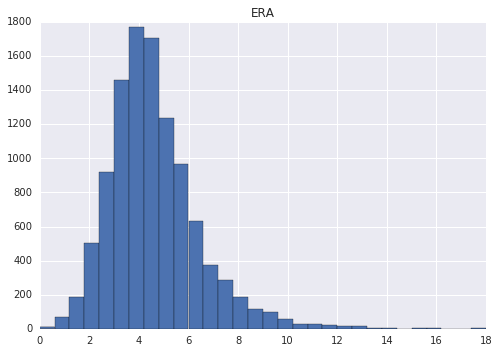

In [73]:
# Make a histogram of ERA over the last 20 years to see the most/least common ERAs.
filtered_twenty.hist(column=['ERA'], bins = 30)
# Uncomment to add labels. (Only worked for me after the graph showed).
# plt.xlabel('ERA')
# plt.ylabel('Count')

Most ERAs fall between 2 and 8, with an average of around 4. There are a few extreme values as well. Summary statistics are provided a few lines below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19a183fed0>]], dtype=object)

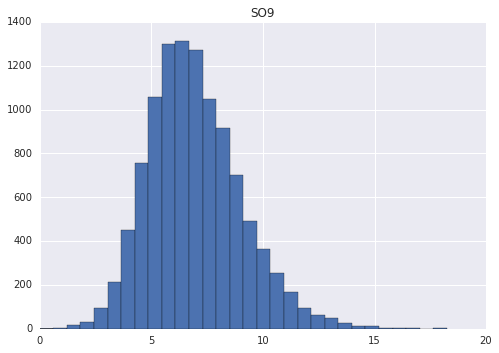

In [74]:
# Let's do the same thing for strikeouts.
filtered_twenty.hist(column=['SO9'], bins = 30)
# Uncomment to add labels. (Only worked for me after the graph showed).
# plt.xlabel('Strikeouts Per 9 Innings')
# plt.ylabel('Count')

Most strikeouts per 9 innings fall between 3 and around 12, with an average of around 7. Summary statistics are provided a few lines below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19a1763310>]], dtype=object)

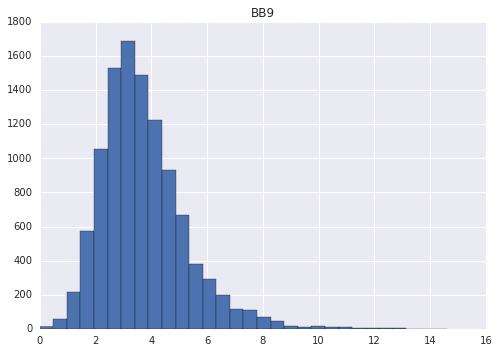

In [75]:
# And finally, walks.
filtered_twenty.hist(column=['BB9'], bins = 30)
# Uncomment to add labels. (Only worked for me after the graph showed).
# plt.xlabel('Walks Per 9 Innings')
# plt.ylabel('Count')

Most walks per 9 innings fall between 1 and 8, with an average of around 3.5. There are a few extreme values as well. Summary statistics are provided below.

In [25]:
# Summary statistics for the above histograms, as well as other stats
print "Mean:" 
print filtered_twenty.mean()
print "Median:"
print filtered_twenty.median()

Mean:
yearID    2005.852204
BB          29.067095
ER          37.699189
H           79.979592
HR           9.194017
IPouts     238.729941
R           40.995900
SO          60.788091
BB9          3.713713
ERA          4.606814
H9           9.266233
HR9          1.104735
R9           5.000072
SO9          6.951080
dtype: float64
Median:
yearID    2006.000000
BB          23.000000
ER          27.000000
H           57.000000
HR           6.000000
IPouts     183.000000
R           29.000000
SO          47.000000
BB9          3.480000
ERA          4.347458
H9           9.130909
HR9          1.015038
R9           4.714286
SO9          6.750000
dtype: float64


Comparing the means to medians, the mean values are generally significantly higher than the median values, likely due to the fact that there are more extreme values at the higher end of the spectrum, and these values are further away from the median than those on the lower end.

Populating the interactive namespace from numpy and matplotlib
Pearson's R:
0.784035682485


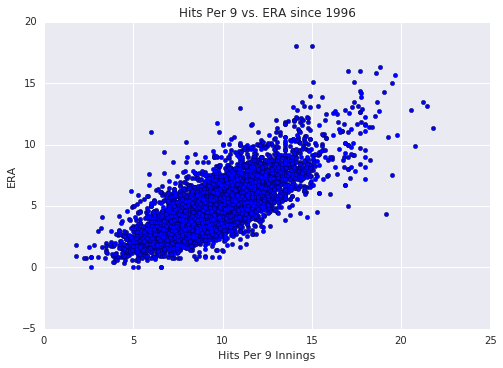

In [26]:
# Graph function in jupyter with graphing tools
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
# Scatterplot with correlation
# We're going to measure the association between hits per 9 and ERA since 1996.
plt.scatter(filtered_twenty['H9'], filtered_twenty['ERA'])
plt.title('Hits Per 9 vs. ERA since 1996')
plt.xlabel('Hits Per 9 Innings')
plt.ylabel('ERA')
print "Pearson's R:"
print correlation(filtered_twenty['H9'], filtered_twenty['ERA'])

The correlation between hits per 9 innings and ERA is pretty strong. This makes sense, as giving up hits makes it more likely for a pitcher to give up runs.

Pearson's R:
0.594838593029


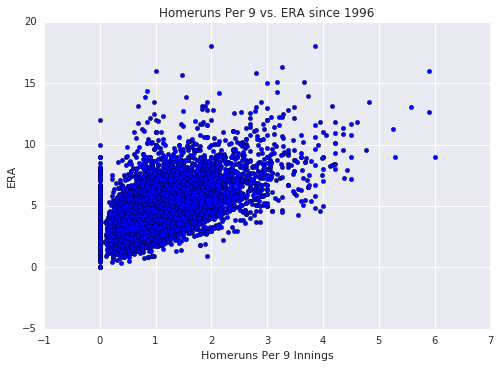

In [27]:
# Now we will do the same for homeruns, strikeouts, and walks.
plt.scatter(filtered_twenty['HR9'], filtered_twenty['ERA'])
plt.title('Homeruns Per 9 vs. ERA since 1996')
plt.xlabel('Homeruns Per 9 Innings')
plt.ylabel('ERA')
print "Pearson's R:"
print correlation(filtered_twenty['HR9'], filtered_twenty['ERA'])

The correlation between homeruns per 9 innings and ERA is not quite as strong. Homeruns are automatic earned runs, so we should expect a good amount of correlation, but homeruns are much more rare than hits, so it makes sense that the correlation is significantly weaker.

Pearson's R:
-0.293127163349


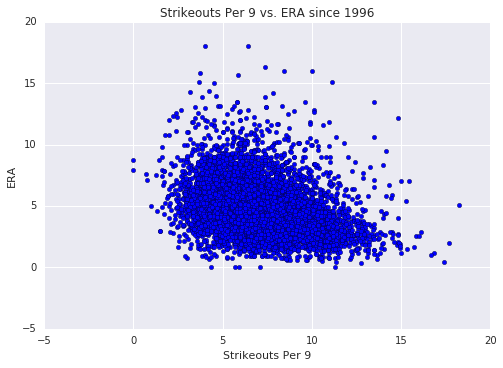

In [28]:
plt.scatter(filtered_twenty['SO9'], filtered_twenty['ERA'])
plt.title('Strikeouts Per 9 vs. ERA since 1996')
plt.xlabel('Strikeouts Per 9')
plt.ylabel('ERA')
print "Pearson's R:"
print correlation(filtered_twenty['SO9'], filtered_twenty['ERA'])

The correlation between strikeouts per 9 innings and ERA is far weaker than the previous two examples, but is still significant. Strikeouts are slightly more valuable than a regular out depending on the situation because the ball is not put into play so runners cannot advance. In addition, it makes sense intuitively that pitcher with a lot of strikeouts is probably a good pitcher.

Pearson's R:
0.393339056883


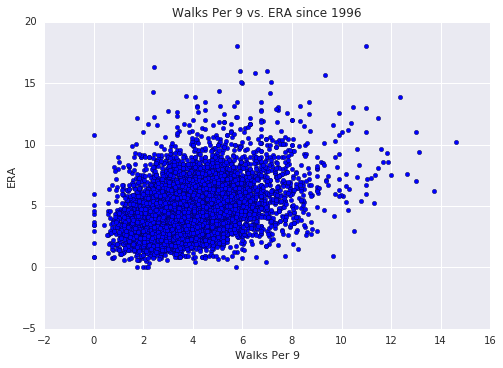

In [29]:
plt.scatter(filtered_twenty['BB9'], filtered_twenty['ERA'])
plt.title('Walks Per 9 vs. ERA since 1996')
plt.xlabel('Walks Per 9')
plt.ylabel('ERA')
print "Pearson's R:"
print correlation(filtered_twenty['BB9'], filtered_twenty['ERA'])

The correlation between walks per 9 innings and ERA is a little bit stronger than strikeouts. Giving up walks is obviously not a good thing for a pitcher, and pitchers who tend to give up more walks are probably not the most accurate pitchers, so the middling correlation is reasonable.

Pearson's R:
-0.159398119844


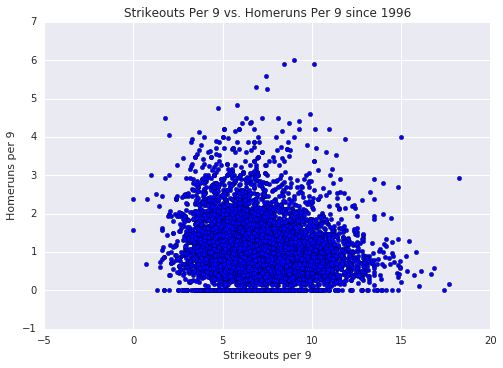

In [30]:
# Let's examine strikeouts versus homeruns and walks versus strikeouts to see if there is any correlation.
plt.scatter(filtered_twenty['SO9'], filtered_twenty['HR9'])
plt.title('Strikeouts Per 9 vs. Homeruns Per 9 since 1996')
plt.xlabel('Strikeouts per 9')
plt.ylabel('Homeruns per 9')
print "Pearson's R:"
print correlation(filtered_twenty['SO9'], filtered_twenty['HR9'])

For fun, I decided to look at strikeouts versus homeruns. There wasn't much correlation.

Pearson's R:
0.0595013006241


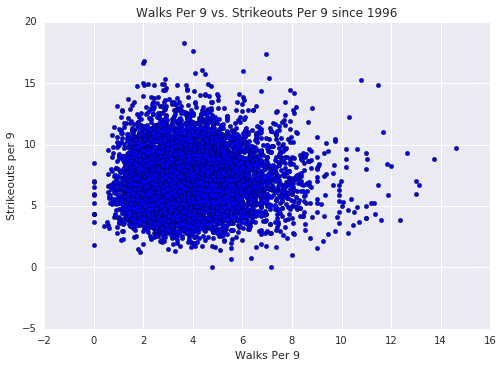

In [31]:
plt.scatter(filtered_twenty['BB9'], filtered_twenty['SO9'])
plt.title('Walks Per 9 vs. Strikeouts Per 9 since 1996')
plt.xlabel('Walks Per 9')
plt.ylabel('Strikeouts per 9')
print "Pearson's R:"
print correlation(filtered_twenty['BB9'], filtered_twenty['SO9'])

There is essentially no correlation between walks and strikeouts.

Hits per 9 innings has the highest magnitude of correlation to current ERA.

Walks per 9 innings correlates more with ERA than strikeouts per 9 innings.

In [32]:
# All the correlations between two stats
filtered_twenty.corr(method = 'pearson')

,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
yearID,1.000000,-0.149534,-0.134061,-0.094398,-0.119289,-0.064532,-0.137947,0.004823,-0.144200,-0.154813,-0.121390,-0.102543,-0.164176,0.188269
BB,-0.149534,1.000000,0.863599,0.845290,0.764960,0.865089,0.866988,0.804165,-0.005554,-0.123659,-0.119217,-0.106710,-0.121638,-0.015856
ER,-0.134061,0.863599,1.000000,0.966103,0.918571,0.918467,0.996661,0.776698,-0.245289,0.040988,0.096450,0.039399,0.034859,-0.179860
H,-0.094398,0.845290,0.966103,1.000000,0.890494,0.973173,0.968805,0.842591,-0.344788,-0.113634,0.030151,-0.061666,-0.112906,-0.152367
HR,-0.119289,0.764960,0.918571,0.890494,1.000000,0.861434,0.914766,0.741665,-0.289686,0.001513,0.042585,0.229190,-0.005052,-0.139750
IPouts,-0.064532,0.865089,0.918467,0.973173,0.861434,1.000000,0.922034,0.921795,-0.359466,-0.238536,-0.134143,-0.131313,-0.239559,-0.046369
R,-0.137947,0.866988,0.996661,0.968805,0.914766,0.922034,1.000000,0.779900,-0.246533,0.027687,0.092868,0.030054,0.033945,-0.180239
SO,0.004823,0.804165,0.776698,0.842591,0.741665,0.921795,0.779900,1.000000,-0.321365,-0.315258,-0.260871,-0.175391,-0.319021,0.251071
BB9,-0.144200,-0.005554,-0.245289,-0.344788,-0.289686,-0.359466,-0.246533,-0.321365,1.000000,0.393339,0.110598,0.103980,0.397479,0.059501
ERA,-0.154813,-0.123659,0.040988,-0.113634,0.001513,-0.238536,0.027687,-0.315258,0.393339,1.000000,0.784036,0.594839,0.975119,-0.293127


In [33]:
# Let's run a multiple linear regression to find a formula for predicting a pitcher's ERA based off some these stats
# Each of the factors shows some degree of correlation, but by combining them, perhaps we can find a better R value.
from pandas.stats.api import ols
result_era = ols(y=filtered_twenty['ERA'], x=filtered_twenty[['H9', 'HR9', 'SO9', 'BB9']])
result_era

/home/matt/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <intercept>

Number of Observations:         10731
Number of Degrees of Freedom:   5

R-squared:         0.7760
Adj R-squared:     0.7759

Rmse:              0.8648

F-stat (4, 10726):  9291.1544, p-value:     0.0000

Degrees of Freedom: model 4, resid 10726

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9     0.5498     0.0049     111.46     0.0000     0.5401     0.5594
           HR9     0.8350     0.0149      56.13     0.0000     0.8059     0.8642
           SO9     0.0091     0.0045       2.01     0.0440     0.0002     0.0179
           BB9     0.3558     0.0056      63.23     0.0000     0.3448     0.3668
     intercept    -2.7944     0.0631     -44.3

The R-squared shows the proportion of the variance in the dependent variable that is predictable from the independent.(Later I will give the R-value, as that is what I have been using to this point.)

The estimated coefficients show the change in the dependent variable based off a one unit change in the independent. So the estimated coefficients can be used to predict the ERA, shown below.

In [34]:
# Function to predict a player's current ERA based off their other adjusted stats
def predict_current_ERA(player):
    a = 0.5498 * player['H9'] + 0.8350 * player['HR9'] + 0.0091 * player['SO9'] + 0.3558 * player['BB9'] \
    - 2.7944
    return pd.Series(dict(col1=a))

filtered_twenty['Predicted_ERA'] = filtered_twenty.apply(predict_current_ERA, axis=1)
compare_current = filtered_twenty[['playerID', 'yearID', 'IPouts', 'ERA', 'Predicted_ERA']]
compare_current.head()

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,playerID,yearID,IPouts,ERA,Predicted_ERA
0,aardsda01,2004,32.0,6.750000,10.228459
1,aardsda01,2006,159.0,4.075472,4.077032
2,aardsda01,2007,97.0,6.402062,5.878557
3,aardsda01,2008,146.0,5.547945,5.190776
4,aardsda01,2009,214.0,2.523364,2.644132


Pearson's R:
0.880926378864


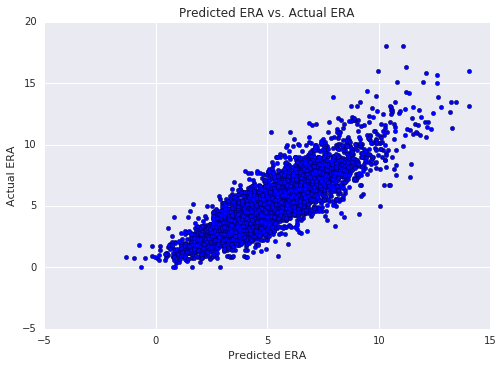

In [35]:
# Applying the MLR gives a far higher Pearson's R than any single stat.
# It's interesting that my doesn't do quite as well for extreme values. 
plt.scatter(filtered_twenty['Predicted_ERA'], filtered_twenty['ERA'])
plt.title('Predicted ERA vs. Actual ERA')
plt.xlabel('Predicted ERA')
plt.ylabel('Actual ERA')
print "Pearson's R:"
print correlation(filtered_twenty['Predicted_ERA'], filtered_twenty['ERA'])

Using homeruns, hits, strikeouts, and walks, per nine innings, ERA is predicted and compared to actual ERA. The Pearson's R value of 0.88 indicates the model should have some predictive value.

I finished the project earlier than intended, so I decided to take this a step further.
Problem #2: What rookie statistics make good predictors of a pitcher's future ERA?

In [36]:
# Find rookie years using groupby and first
rookie_year = organized_pitchers.groupby('playerID').first()
rookie_year.head()

,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
playerID,,,,,,,,,,,,,,
aardsda01,2004,10,8,20,1,32.0,8,5,8.437500,6.750000,16.875000,0.843750,6.750000,4.218750
aasedo01,1977,19,32,85,6,277.0,36,49,1.851986,3.119134,8.285199,0.584838,3.509025,4.776173
abadfe01,2010,5,6,14,3,57.0,6,12,2.368421,2.842105,6.631579,1.421053,2.842105,5.684211
abbeybe01,1892,76,75,207,7,587.0,139,77,3.495741,3.449744,9.521295,0.321976,6.393526,3.541738
abbeych01,1896,0,1,6,0,6.0,3,0,0.000000,4.500000,27.000000,0.000000,13.500000,0.000000


In [37]:
# Filter by the last 20 years and more than 26 outs
# I couldn't get this to work in a single function, but there's probably a way
recent_rookies = rookie_year.loc[rookie_year['yearID'] >= 1996] 
recent_filtered_rookies = recent_rookies.loc[recent_rookies['IPouts'] >= 27]
recent_filtered_rookies.head()

,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
playerID,,,,,,,,,,,,,,
aardsda01,2004,10,8,20,1,32.0,8,5,8.437500,6.750000,16.875000,0.843750,6.750000,4.218750
abadfe01,2010,5,6,14,3,57.0,6,12,2.368421,2.842105,6.631579,1.421053,2.842105,5.684211
accarje01,2005,9,13,26,2,89.0,13,16,2.730337,3.943820,7.887640,0.606742,3.943820,4.853933
aceveal01,2008,10,8,25,4,90.0,8,16,3.000000,2.400000,7.500000,1.200000,2.400000,4.800000
acevejo01,2001,34,58,101,17,288.0,61,68,3.187500,5.437500,9.468750,1.593750,5.718750,6.375000


In [38]:
# Use nth to find additional years
second_year = organized_pitchers.groupby('playerID').nth(1)
recent_second = second_year.loc[second_year['yearID'] >= 1996]

third_year = organized_pitchers.groupby('playerID').nth(2)
recent_third = third_year.loc[third_year['yearID'] >= 1996]

fourth_year = organized_pitchers.groupby('playerID').nth(3)
recent_fourth = fourth_year.loc[fourth_year['yearID'] >= 1996]

fifth_year = organized_pitchers.groupby('playerID').nth(4)
recent_fifth = fifth_year.loc[fifth_year['yearID'] >= 1996]

sixth_year = organized_pitchers.groupby('playerID').nth(5)
recent_sixth = sixth_year.loc[sixth_year['yearID'] >= 1996]
recent_sixth.head()

,BB,BB9,ER,ERA,H,H9,HR,HR9,IPouts,R,R9,SO,SO9,yearID
playerID,,,,,,,,,,,,,,
aardsda01,25,4.530201,19,3.442953,33,5.979866,5,0.906040,149.0,19,3.442953,49,8.879195,2010
abadfe01,19,3.587413,22,4.153846,45,8.496503,11,2.076923,143.0,23,4.342657,45,8.496503,2015
abbotpa01,32,3.963303,25,3.096330,50,6.192661,9,1.114679,218.0,31,3.839450,68,8.422018,1999
accarje01,3,4.050000,6,8.100000,12,16.200000,0,0.000000,20.0,6,8.100000,3,4.050000,2010
aceveal01,22,5.351351,20,4.864865,42,10.216216,8,1.945946,111.0,21,5.108108,24,5.837838,2013


In [39]:
# Add second and third years
two_and_three = recent_second.add(recent_third, fill_value = 0)
two_and_three.head()

,BB,BB9,ER,ERA,H,H9,HR,HR9,IPouts,R,R9,SO,SO9,yearID
playerID,,,,,,,,,,,,,,
aardsda01,45.0,9.486676,47.0,10.477534,80.0,17.817934,13.0,2.641704,256.0,49.0,10.925695,85.0,18.341373,4013.0
abadfe01,28.0,7.836035,42.0,12.408990,85.0,23.965733,11.0,3.462049,197.0,45.0,13.519897,53.0,14.299189,4023.0
abreuwi01,13.0,8.670330,27.0,16.434066,47.0,25.978022,9.0,5.076923,109.0,29.0,18.230769,32.0,16.714286,4016.0
accarje01,44.0,5.816616,57.0,7.486440,127.0,16.729875,11.0,1.447697,409.0,61.0,8.017865,111.0,14.662290,4013.0
aceveal01,20.0,4.714286,37.0,6.535714,79.0,14.892857,11.0,1.821429,288.0,41.0,7.607143,71.0,8.892857,4019.0


In [40]:
# adding up the second through the sixth year
two_thru_four = two_and_three.add(recent_fourth, fill_value = 0)
two_thru_five = two_thru_four.add(recent_fifth, fill_value = 0)
two_thru_six = two_thru_five.add(recent_sixth, fill_value = 0)
two_thru_six.drop(two_thru_six.columns[[1, 3, 5, 7, 10, 12, 13]], axis=1, inplace=True)
two_thru_six.head()

,BB,ER,H,HR,IPouts,R,SO
playerID,,,,,,,
aardsda01,139.0,116.0,211.0,26.0,765.0,123.0,263.0
abadfe01,72.0,88.0,206.0,29.0,625.0,93.0,181.0
abbotky01,5.0,9.0,10.0,1.0,12.0,9.0,3.0
abbotpa01,42.0,36.0,74.0,11.0,292.0,42.0,90.0
abreuwi01,13.0,27.0,47.0,9.0,109.0,29.0,32.0


In [41]:
# Adjusting stats as before
two_thru_six['BB9'] = two_thru_six['BB']/(two_thru_six['IPouts'] / 27)
two_thru_six['ERA'] = two_thru_six['ER']/(two_thru_six['IPouts'] / 27)
two_thru_six['H9'] = two_thru_six['H']/(two_thru_six['IPouts'] / 27)
two_thru_six['HR9'] = two_thru_six['HR']/(two_thru_six['IPouts'] / 27)
two_thru_six['R9'] = two_thru_six['R']/(two_thru_six['IPouts'] / 27)
two_thru_six['SO9'] = two_thru_six['SO']/(two_thru_six['IPouts'] / 27)
two_thru_six.head()

,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
playerID,,,,,,,,,,,,,
aardsda01,139.0,116.0,211.0,26.0,765.0,123.0,263.0,4.905882,4.094118,7.447059,0.917647,4.341176,9.282353
abadfe01,72.0,88.0,206.0,29.0,625.0,93.0,181.0,3.110400,3.801600,8.899200,1.252800,4.017600,7.819200
abbotky01,5.0,9.0,10.0,1.0,12.0,9.0,3.0,11.250000,20.250000,22.500000,2.250000,20.250000,6.750000
abbotpa01,42.0,36.0,74.0,11.0,292.0,42.0,90.0,3.883562,3.328767,6.842466,1.017123,3.883562,8.321918
abreuwi01,13.0,27.0,47.0,9.0,109.0,29.0,32.0,3.220183,6.688073,11.642202,2.229358,7.183486,7.926606


In [42]:
# Let's find the averages
early_career = two_thru_six.loc[two_thru_six['IPouts'] >= 250]
early_career.head()

,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
playerID,,,,,,,,,,,,,
aardsda01,139.0,116.0,211.0,26.0,765.0,123.0,263.0,4.905882,4.094118,7.447059,0.917647,4.341176,9.282353
abadfe01,72.0,88.0,206.0,29.0,625.0,93.0,181.0,3.110400,3.801600,8.899200,1.252800,4.017600,7.819200
abbotpa01,42.0,36.0,74.0,11.0,292.0,42.0,90.0,3.883562,3.328767,6.842466,1.017123,3.883562,8.321918
accarje01,68.0,79.0,177.0,14.0,540.0,85.0,137.0,3.400000,3.950000,8.850000,0.700000,4.250000,6.850000
aceveal01,115.0,140.0,285.0,38.0,993.0,150.0,250.0,3.126888,3.806647,7.749245,1.033233,4.078550,6.797583


In [43]:
# Mean statistics
print "Rookie Averages:" 
print recent_filtered_rookies.mean()
print "Early Career Averages:"
print early_career.mean()

Rookie Averages:
yearID    2006.049913
BB          18.171213
ER          22.176436
H           44.203134
HR           5.306442
IPouts     130.169472
R           24.039466
SO          32.578062
BB9          4.122689
ERA          4.918747
H9           9.390505
HR9          1.153494
R9           5.339297
SO9          6.848439
dtype: float64
Early Career Averages:
BB         126.756136
ER         160.601742
H          340.697546
HR          38.878860
IPouts    1024.756928
R          174.946952
SO         264.076801
BB9          3.551007
ERA          4.329387
H9           9.016525
HR9          1.042170
R9           4.714504
SO9          7.020469
dtype: float64


Per 9 innings, walks, hits, and homeruns given up tends to modestly decline from a player's rookie season into the next few years, while strikeouts per 9 modestly increases. ERA has a sharper decrease, comparitively. 

In [44]:
# Find correlations as before. This time we will include rookie ERA.
print "Pearson's R:"
print correlation(recent_filtered_rookies['ERA'], early_career['ERA'])

Pearson's R:
0.2132358336


In [45]:
print "Pearson's R:"
print correlation(recent_filtered_rookies['SO9'], early_career['ERA'])

Pearson's R:
-0.306260951418


In [46]:
print "Pearson's R:"
print correlation(recent_filtered_rookies['H9'], early_career['ERA'])

Pearson's R:
0.182783631886


In [47]:
print "Pearson's R:"
print correlation(recent_filtered_rookies['HR9'], early_career['ERA'])

Pearson's R:
0.133732862115


In [48]:
print "Pearson's R:"
print correlation(recent_filtered_rookies['BB9'], early_career['ERA'])

Pearson's R:
0.112953927833


This time, rookie strikeouts have the highest magnitude of correlation, followed by rookie ERA.

In [49]:
# Let's run a multiple linear regression to find the formula for predicting a pitcher's ERA based off these stats
from pandas.stats.api import ols
result_era = ols(y=early_career['ERA'], x=recent_filtered_rookies[['H9', 'HR9', 'SO9', 'BB9', 'ERA']])
result_era


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <ERA> + <intercept>

Number of Observations:         868
Number of Degrees of Freedom:   6

R-squared:         0.1308
Adj R-squared:     0.1258

Rmse:              0.8705

F-stat (5, 862):    25.9505, p-value:     0.0000

Degrees of Freedom: model 5, resid 862

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9    -0.0237     0.0237      -1.00     0.3183    -0.0701     0.0228
           HR9     0.0441     0.0546       0.81     0.4203    -0.0630     0.1512
           SO9    -0.1301     0.0148      -8.78     0.0000    -0.1591    -0.1010
           BB9     0.0657     0.0216       3.04     0.0024     0.0234     0.1080
           ERA     0.0567     0.0311       1

In [50]:
# Let's apply this to rookies in the last twenty years.
rookies_20 = rookie_year.loc[rookie_year['yearID'] >= 1996]
rooks = rookies_20.loc[rookies_20['IPouts'] >= 125]
rooks.head()

,yearID,BB,ER,H,HR,IPouts,R,SO,BB9,ERA,H9,HR9,R9,SO9
playerID,,,,,,,,,,,,,,
acevejo01,2001,34,58,101,17,288.0,61,68,3.187500,5.437500,9.468750,1.593750,5.718750,6.375000
adamsmi03,2004,14,20,50,5,159.0,21,39,2.377358,3.396226,8.490566,0.849057,3.566038,6.622642
adamswi02,1996,23,34,76,11,229.0,39,68,2.711790,4.008734,8.960699,1.296943,4.598253,8.017467
adcocna01,2011,26,31,63,5,181.0,34,36,3.878453,4.624309,9.397790,0.745856,5.071823,5.370166
affelje01,2002,37,40,85,8,233.0,41,67,4.287554,4.635193,9.849785,0.927039,4.751073,7.763948


In [51]:
# Drop the unnecessary columns
rooks.drop(rooks.columns[[0, 1, 2, 3, 4, 5, 6, 7, 12]], axis=1, inplace=True)
rooks.head()

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,BB9,ERA,H9,HR9,SO9
playerID,,,,,
acevejo01,3.187500,5.437500,9.468750,1.593750,6.375000
adamsmi03,2.377358,3.396226,8.490566,0.849057,6.622642
adamswi02,2.711790,4.008734,8.960699,1.296943,8.017467
adcocna01,3.878453,4.624309,9.397790,0.745856,5.370166
affelje01,4.287554,4.635193,9.849785,0.927039,7.763948


In [52]:
# Now we can put together a formula to predict a player's future ERA based off rookie stats.
def calculate(player):
    a = -0.0237 * player['H9'] + 0.0441 * player['HR9'] + -0.1301 * player['SO9'] + 0.0657 * player['BB9'] \
    + 0.0567 * player['ERA'] + 4.8307
    return pd.Series(dict(col1=a))

rooks['Years 2-6 Predicted ERA'] = rooks.apply(calculate, axis=1)
rooks.head()

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BB9,ERA,H9,HR9,SO9,Years 2-6 Predicted ERA
playerID,,,,,,
acevejo01,3.187500,5.437500,9.468750,1.593750,6.375000,4.364912
adamsmi03,2.377358,3.396226,8.490566,0.849057,6.622642,4.154070
adamswi02,2.711790,4.008734,8.960699,1.296943,8.017467,4.037914
adcocna01,3.878453,4.624309,9.397790,0.745856,5.370166,4.459219
affelje01,4.287554,4.635193,9.849785,0.927039,7.763948,4.172561


Problem of Age:
Age should certainly be a predictive factor, but it's not included in the CSV

Problem of Truncated Data:
Lots of player stats are incomplete if they didn't play 6 years. They either are too young, missed a year, or didn't 
stick around. If they didn't stick  around, they likely "improve" the early-career means by not being in the data. If they are too young but hit the 250 outs mark, I am not sure how the early-careers are affected.

Problem of Sample Size:
Smaller sample sizes should be regressed heavily to mean

In [53]:
# Let's try to do this another way. We will try to predict future ERA based off of future predicted H9, HR9, etc.

In [54]:
# Predicting early career H9
result_H9 = ols(y=early_career['H9'], x=recent_filtered_rookies[['H9', 'HR9', 'SO9', 'BB9', 'ERA']])
result_H9


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <ERA> + <intercept>

Number of Observations:         868
Number of Degrees of Freedom:   6

R-squared:         0.2329
Adj R-squared:     0.2284

Rmse:              1.0380

F-stat (5, 862):    52.3416, p-value:     0.0000

Degrees of Freedom: model 5, resid 862

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9     0.0374     0.0282       1.32     0.1861    -0.0180     0.0927
           HR9    -0.0718     0.0652      -1.10     0.2708    -0.1995     0.0559
           SO9    -0.2229     0.0177     -12.62     0.0000    -0.2575    -0.1883
           BB9    -0.0575     0.0257      -2.24     0.0256    -0.1079    -0.0071
           ERA     0.0480     0.0371       1

In [55]:
# Function to predict early career H9
def calculate_H9(player):
    a = 0.0374 * player['H9'] + -0.0718 * player['HR9'] + -0.2229 * player['SO9'] + -0.0575 * player['BB9'] \
    + 0.0480 * player['ERA'] + 10.2557
    return pd.Series(dict(col1=a))
# Apply to dataset
rooks['Years 2-6 Predicted H9'] = rooks.apply(calculate_H9, axis=1)

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
result_HR9 = ols(y=early_career['HR9'], x=recent_filtered_rookies[['H9', 'HR9', 'SO9', 'BB9', 'ERA']])
result_HR9


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <ERA> + <intercept>

Number of Observations:         868
Number of Degrees of Freedom:   6

R-squared:         0.0597
Adj R-squared:     0.0543

Rmse:              0.3131

F-stat (5, 862):    10.9470, p-value:     0.0000

Degrees of Freedom: model 5, resid 862

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9    -0.0234     0.0085      -2.74     0.0062    -0.0401    -0.0067
           HR9     0.0584     0.0197       2.97     0.0031     0.0198     0.0969
           SO9    -0.0204     0.0053      -3.84     0.0001    -0.0309    -0.0100
           BB9    -0.0124     0.0078      -1.59     0.1113    -0.0276     0.0028
           ERA     0.0314     0.0112       2

In [57]:
# Function to predict early career homeruns per 9.
def calculate_HR9(player):
    a = -0.0234 * player['H9'] + 0.0584 * player['HR9'] - 0.0204 * player['SO9'] - 0.0124 * player['BB9'] \
    + 0.0314 * player['ERA'] + 1.2300
    return pd.Series(dict(col1=a))

rooks['Years 2-6 Predicted HR9'] = rooks.apply(calculate_HR9, axis=1)

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
result_SO9 = ols(y=early_career['SO9'], x=recent_filtered_rookies[['H9', 'HR9', 'SO9', 'BB9', 'ERA']])
result_SO9


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <ERA> + <intercept>

Number of Observations:         868
Number of Degrees of Freedom:   6

R-squared:         0.3194
Adj R-squared:     0.3155

Rmse:              1.4234

F-stat (5, 862):    80.9100, p-value:     0.0000

Degrees of Freedom: model 5, resid 862

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9    -0.0270     0.0387      -0.70     0.4863    -0.1029     0.0489
           HR9     0.1272     0.0893       1.42     0.1550    -0.0480     0.3023
           SO9     0.4047     0.0242      16.71     0.0000     0.3572     0.4522
           BB9     0.1169     0.0353       3.32     0.0010     0.0478     0.1861
           ERA    -0.0698     0.0508      -1

In [59]:
# Function to predict early career strikeouts per 9
def calculate_SO9(player):
    a = -0.0270 * player['H9'] + 0.1272 * player['HR9'] + 0.4047 * player['SO9'] + 0.1169 * player['BB9'] \
    - 0.0698 * player['ERA'] + 4.2545
    return pd.Series(dict(col1=a))

rooks['Years 2-6 Predicted SO9'] = rooks.apply(calculate_SO9, axis=1)

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
result_BB9 = ols(y=early_career['BB9'], x=recent_filtered_rookies[['H9', 'HR9', 'SO9', 'BB9', 'ERA']])
result_BB9


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <H9> + <HR9> + <SO9> + <BB9> + <ERA> + <intercept>

Number of Observations:         868
Number of Degrees of Freedom:   6

R-squared:         0.2261
Adj R-squared:     0.2216

Rmse:              0.8495

F-stat (5, 862):    50.3740, p-value:     0.0000

Degrees of Freedom: model 5, resid 862

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
            H9    -0.0396     0.0231      -1.71     0.0868    -0.0850     0.0057
           HR9     0.0217     0.0533       0.41     0.6844    -0.0828     0.1262
           SO9     0.0070     0.0145       0.49     0.6260    -0.0213     0.0354
           BB9     0.2928     0.0211      13.91     0.0000     0.2515     0.3341
           ERA    -0.0105     0.0303      -0

In [61]:
# Function to predict early career walks per 9.
def calculate_BB9(player):
    a = -0.0396 * player['H9'] + 0.0217 * player['HR9'] + 0.0070 * player['SO9'] + 0.2928 * player['BB9'] \
    - 0.01015 * player['ERA'] + 2.6535
    return pd.Series(dict(col1=a))

rooks['Years 2-6 Predicted BB9'] = rooks.apply(calculate_BB9, axis=1)

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
# Now we can write a function to calculate ERA based on predictive stats
# I will use the same ERA estimation coefficients that I used to predict a player's ERA based on their current stats, 
# but this time I will use their predicted stats to compute future ERA.
def estimate_era(player):
    a = 0.5498 * player['Years 2-6 Predicted H9'] + 0.8350 * player['Years 2-6 Predicted HR9'] \
    + 0.0091 * player['Years 2-6 Predicted SO9'] + 0.3558 * player['Years 2-6 Predicted BB9'] - 2.7944
    return pd.Series(dict(col1=a))
rooks['Final Predicted ERA'] = rooks.apply(estimate_era, axis=1)
rooks.drop(rooks.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
rooks

/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Years 2-6 Predicted ERA,Years 2-6 Predicted H9,Years 2-6 Predicted HR9,Years 2-6 Predicted SO9,Years 2-6 Predicted BB9,Final Predicted ERA
playerID,,,,,,
acevejo01,4.364912,9.152131,1.102669,6.774612,3.235856,4.371137
adamsmi03,4.154070,9.062419,1.022966,6.854294,3.043675,4.187608
adamswi02,4.037914,8.747107,1.024753,7.459400,3.136246,4.054185
adcocna01,4.459219,9.355571,1.041209,6.399553,3.423798,4.495125
affelje01,4.172561,8.802891,0.987649,7.426224,3.546261,4.199455
alberan01,4.453615,9.848270,1.095570,5.467460,2.585453,4.504638
albural01,3.418642,7.060478,0.828074,10.341920,4.322775,3.411048
alvarhe01,4.205191,9.357095,1.065936,6.327959,2.654610,4.242282
ambrihe01,4.241094,9.145981,1.038058,6.917854,3.110880,4.270643


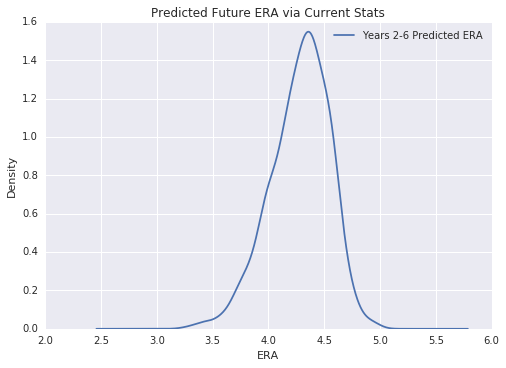

In [63]:
# Density Graph of predicted ERA by rookie stats
predicted_era = rooks[['Years 2-6 Predicted ERA']]
predicted_era.plot.kde(by=['Years 2-6 Predicted ERA'])
plt.title('Predicted Future ERA via Current Stats')
plt.xlabel('ERA')

In [64]:
print "Mean:" 
print predicted_era.mean()
print "Median:"
print predicted_era.median()

Mean:
Years 2-6 Predicted ERA    4.280295
dtype: float64
Median:
Years 2-6 Predicted ERA    4.313718
dtype: float64


The mean and median predicted ERA is about 4.3 in the first model.

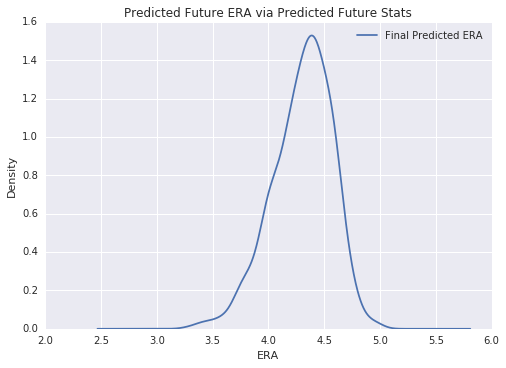

In [65]:
# Density Graph of predicted ERA by predicted future stats
estimated_era = rooks[['Final Predicted ERA']]
estimated_era.plot.kde(by=['Final Predicted ERA'])
plt.title('Predicted Future ERA via Predicted Future Stats')
plt.xlabel('ERA')

In [66]:
print "Mean:" 
print estimated_era.mean()
print "Median:"
print estimated_era.median()

Mean:
Final Predicted ERA    4.302102
dtype: float64
Median:
Final Predicted ERA    4.335635
dtype: float64


The mean and median predicted ERA is also about 4.3 in the second model.

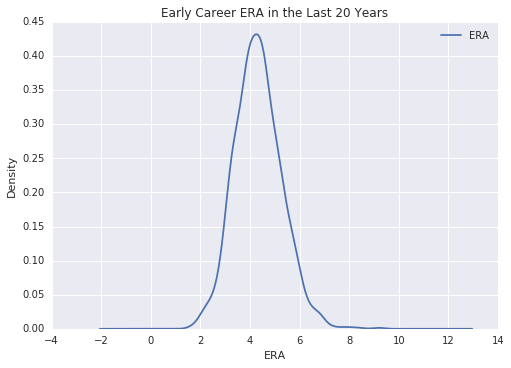

In [67]:
# Actual early career ERAs
actual_era = early_career[['ERA']]
actual_era.plot.kde(by=['ERA'])
plt.title('Early Career ERA in the Last 20 Years')
plt.xlabel('ERA')

In [68]:
print "Mean:" 
print actual_era.mean()
print "Median:"
print actual_era.median()

Mean:
ERA    4.329387
dtype: float64
Median:
ERA    4.295207
dtype: float64


The actual ERA also has means and medians of about 4.3. The density curves of the models and the actual ERA are similar, but the density graph reaches a smaller peak and is more spread out, indicating more variance.

Pearson's R:
0.997805538608


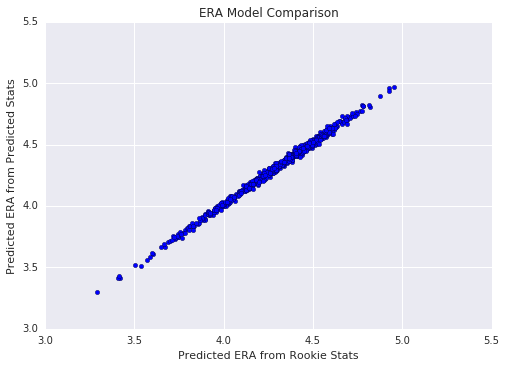

In [69]:
# The two predictive models are largely in agreement (as evidenced by their own correlation) but they don't have the 
# variance that actual ERAs exhibit.
plt.scatter(rooks['Years 2-6 Predicted ERA'], rooks['Final Predicted ERA'])
plt.title('ERA Model Comparison')
plt.xlabel('Predicted ERA from Rookie Stats')
plt.ylabel('Predicted ERA from Predicted Stats')
print "Pearson's R:"
print correlation(rooks['Years 2-6 Predicted ERA'], rooks['Final Predicted ERA'])

The results between the two models are nearly identical despite utilizing different methods. 

In [70]:
# Mean for the predictions versus actual early career means.
print "Rooks averages"
print rooks.mean()
print "Early-Career averages"
print early_career.mean()

Rooks averages
Years 2-6 Predicted ERA    4.280295
Years 2-6 Predicted H9     9.032217
Years 2-6 Predicted HR9    1.038853
Years 2-6 Predicted SO9    6.966189
Years 2-6 Predicted BB9    3.371992
Final Predicted ERA        4.302102
dtype: float64
Early-Career averages
BB         126.756136
ER         160.601742
H          340.697546
HR          38.878860
IPouts    1024.756928
R          174.946952
SO         264.076801
BB9          3.551007
ERA          4.329387
H9           9.016525
HR9          1.042170
R9           4.714504
SO9          7.020469
dtype: float64


The means of the predicted stats (hits, homeruns, and strikeouts per 9) are very close to the actual early career means, with the possible exception of walks per 9 (3.37 vs. 3.55). 

In [71]:
# Some descriptive statistics of early career stats
early_career_stats = early_career[['H9', 'HR9', 'SO9', 'BB9', 'HR9', 'ERA']]
early_career_stats.describe()

,H9,HR9,SO9,BB9,HR9,ERA
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,9.016525,1.042170,7.020469,3.551007,1.042170,4.329387
std,1.201737,0.323653,1.741450,0.964001,0.323653,0.947682
min,4.711014,0.108000,2.696671,1.063291,0.108000,1.702950
25%,8.258293,0.810507,5.795660,2.895349,0.810507,3.691927
50%,9.000000,1.026821,6.838710,3.464789,1.026821,4.295207
75%,9.814973,1.253186,7.997382,4.108494,1.253186,4.930735
max,13.453287,2.412104,15.516903,8.810526,2.412104,9.208609


In [72]:
# Some predictive statistics of early career stats
# The means are similar, but there is far less variance in the predicted data.
rooks.describe()

,Years 2-6 Predicted ERA,Years 2-6 Predicted H9,Years 2-6 Predicted HR9,Years 2-6 Predicted SO9,Years 2-6 Predicted BB9,Final Predicted ERA
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,4.280295,9.032217,1.038853,6.966189,3.371992,4.302102
std,0.264577,0.469748,0.057368,0.806380,0.333943,0.268034
min,3.291128,7.060478,0.828074,5.264123,2.544602,3.303686
25%,4.122710,8.705291,0.998402,6.368587,3.128173,4.139753
50%,4.313718,9.086770,1.038614,6.877068,3.348456,4.335635
75%,4.473143,9.371487,1.079409,7.510065,3.587249,4.494291
max,4.955102,10.054756,1.210055,10.341920,4.451863,4.973715


As with ERA, there is far less variance in in the predicted stats than in the actual stats, despite the means being similar.

Conclusion:
Giving up hits and homeruns correlates with a poor current ERA, while walks per 9 innings correlates with a pitcher's 
ERA better than strikeouts. Combining these stats using a multiple linear regression produces a far better correlation
to ERA than any of them in isolation. When it comes to predicting a pitcher's future ERA from rookie stats, strikeouts 
followed by ERA are the most important statistics.

My two predictive models miss the actual future ERA mean by only a few hundredth points, which is less than 1% error and
is satisfactory. However, the models appear to regress nearly everyone to the mean, so the 25th and 75th percentiles
badly miss the mark.

Limitations: 
My two models (based off multiple linear regressions) to predict a pitcher's ERA in years 2-6 from the rookie season 
produced almost identical results. The assumption that differences in walks, strikeouts, homeruns, and ERA variance were indicative of future ability (and were not random) noise was not directly tested but was assumed, so there is room for doubt about the meaningfulness of these predictive statistics.

The model also suffers from problems of data truncation due to the fact that many pitchers are 
included in the data who did not play six years, but it is difficult to determine the overall effect of this truncation. 
The model also would have ideally accounted for age, but that information was not included in the dataset. Nevertheless, the overall similarity of the model's predicted density curve to the actual early career density curve indicates that the model is a good starting point, despite the predicted variance falling well short of the actual variance.

Special thanks to Myles Callan, who guided me through some difficulties on the following forum:
https://discussions.udacity.com/t/baseball-data-merging-players-who-play-on-multiple-teams-in-a-year/173158

Pandas documentation was also used as a supplement:
http://pandas.pydata.org/pandas-docs/stable/